In [60]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from yahoo_historical import Fetcher


In [61]:
ticker = 'XQQ.TO'
start = [2019,1,1]

df = Fetcher(ticker, start).getHistorical()	
#df = df[['Date','Close']]
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200


In [62]:
exp1 = df.Close.ewm(span=12, adjust=False).mean()
exp2 = df.Close.ewm(span=26, adjust=False).mean()

#df['macd'] = exp1-exp2
#df['signal'] = macd.ewm(span=9, adjust=False).mean()
macd = exp1-exp2
signal = macd.ewm(span=9, adjust=False).mean()
df['macd'] = macd-signal

print(signal.shape)
print(macd.shape)

(377,)
(377,)


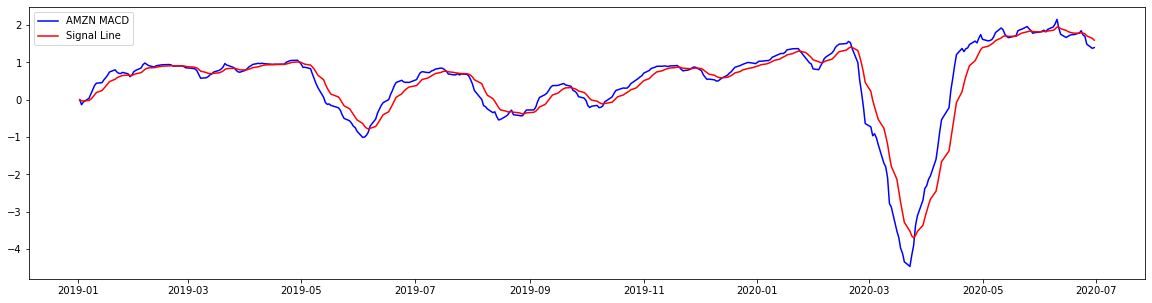

In [63]:
plt.figure(figsize=(20,5))
plt.plot(df.Date, macd, label='AMZN MACD', color = 'b')
plt.plot(df.Date, signal, label='Signal Line', color='r')
plt.legend(loc='upper left')
plt.show()


In [64]:
pd.set_option('max.rows',None)
df[df.Date>=pd.to_datetime('2020-1-1')].head(100)

,Date,Open,High,Low,Close,Adj Close,Volume,macd
251,2020-01-02,70.290001,70.720001,70.150002,70.720001,70.602570,20800,0.117710
252,2020-01-03,69.900002,70.519997,69.900002,70.199997,70.083435,37800,0.092932
253,2020-01-06,69.529999,70.570000,69.529999,70.570000,70.452820,28600,0.087594
254,2020-01-07,70.529999,70.750000,70.430000,70.570000,70.452820,9500,0.070910
255,2020-01-08,70.480003,71.419998,70.480003,71.059998,70.942001,23100,0.079096
256,2020-01-09,71.730003,71.830002,71.349998,71.690002,71.570961,29700,0.111197
257,2020-01-10,72.050003,72.050003,71.500000,71.550003,71.431198,15200,0.107210
258,2020-01-13,71.860001,72.360001,71.760002,72.330002,72.209900,22900,0.139282
259,2020-01-14,72.330002,72.379997,72.000000,72.029999,71.910393,20300,0.123032
260,2020-01-15,72.180000,72.419998,71.930000,72.019997,71.900414,22600,0.095574


In [65]:
a = macd.values-signal.values
a.shape

(377,)

In [66]:
df['macd'] = macd-signal
df['buy'] = df.macd>0
df.buy = df.buy.astype(int)
df['chg_pct'] = 100*(df.Close-df.Close.shift(1))/df.Close.shift(1)
df['chg'] = df.Close-df.Close.shift(1)
df.head(20)

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy,chg_pct,chg
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900,0.000000,0,NaN,NaN
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300,-0.106575,0,-3.254088,-1.669998
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400,-0.027784,0,4.410872,2.189998
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800,0.056548,1,1.003088,0.520001
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200,0.139166,1,0.974022,0.509998
5,2019-01-09,53.049999,53.450001,52.869999,53.279999,52.749107,214600,0.209680,1,0.775487,0.410000
6,2019-01-10,53.000000,53.430000,52.619999,53.419998,52.887714,215800,0.251201,1,0.262761,0.139999
7,2019-01-11,53.279999,53.279999,52.950001,53.220001,52.689709,90400,0.250104,1,-0.374386,-0.199997
8,2019-01-14,52.889999,52.950001,52.610001,52.849998,52.323395,84800,0.210932,1,-0.695233,-0.370003
9,2019-01-15,52.810001,53.799999,52.810001,53.730000,53.194626,111100,0.229241,1,1.665094,0.880002


In [67]:
state=0
df_sig = []
for i in range(df.shape[0]):
    if((df.buy[i]==1) & (state==0)):
        state = 1
        df_sig.append(df.iloc[i,:].to_frame().T)
    if((df.buy[i]==0) & (state==1)):
        state=0
        df_sig.append(df.iloc[i].to_frame().T)
        
        

In [68]:
len(df_sig)

32

In [69]:
df_sig = pd.concat(df_sig, axis=0)
df_sig = df_sig.reset_index(drop=True)

In [70]:
df_sig['chg_pct'] =100*(df_sig.Close-df_sig.Close.shift(1))/df_sig.Close.shift(1)
df_sig

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy,chg_pct,chg
0,2019-01-07,51.96,52.6,51.85,52.36,51.8383,84800,0.0565482,1,NaN,0.520001
1,2019-01-29,54.01,54.01,53.32,53.47,52.9372,49200,-0.0314873,0,2.11994,-0.469998
2,2019-01-30,54.03,54.94,53.92,54.78,54.2342,65000,0.0057233,1,2.44997,1.31
3,2019-02-21,56.76,56.83,56.37,56.64,56.0756,21200,-0.00769801,0,3.3954,-0.200001
4,2019-03-15,58.61,59.02,58.52,58.81,58.224,44900,0.036206,1,3.83122,0.5
5,2019-03-27,59.26,59.26,58.42,58.85,58.2636,47600,-0.0409,0,0.0680105,-0.330002
6,2019-04-02,60.21,60.42,60.08,60.4,59.7982,11600,0.0268894,1,2.63382,0.180001
7,2019-05-01,63.03,63.16,62.42,62.46,61.8376,42400,-0.0479164,0,3.41059,-0.170002
8,2019-06-07,58.88,59.78,58.88,59.67,59.0754,55000,0.0588734,1,-4.46686,1.16
9,2019-07-19,63.67,63.67,62.68,62.69,62.4573,14900,-0.0588751,0,5.06117,-0.5


In [71]:
df_sig1 = df_sig[df_sig.buy==0]
df_sig1

,Date,Open,High,Low,Close,Adj Close,Volume,macd,buy,chg_pct,chg
1,2019-01-29,54.01,54.01,53.32,53.47,52.9372,49200,-0.0314873,0,2.11994,-0.469998
3,2019-02-21,56.76,56.83,56.37,56.64,56.0756,21200,-0.00769801,0,3.3954,-0.200001
5,2019-03-27,59.26,59.26,58.42,58.85,58.2636,47600,-0.0409,0,0.0680105,-0.330002
7,2019-05-01,63.03,63.16,62.42,62.46,61.8376,42400,-0.0479164,0,3.41059,-0.170002
9,2019-07-19,63.67,63.67,62.68,62.69,62.4573,14900,-0.0588751,0,5.06117,-0.5
11,2019-08-23,61.2,61.7,59.51,59.6,59.3788,101700,-0.0691068,0,-3.35658,-2.07
13,2019-09-24,62.78,62.95,61.46,61.66,61.4312,98700,-0.0596464,0,0.0974058,-0.93
15,2019-11-21,66.13,66.2,65.98,66.1,65.8547,16400,-0.040217,0,5.15431,-0.120003
17,2019-12-02,66.93,66.93,66.2,66.47,66.2233,29000,-0.0548571,0,-1.54051,-0.869995
19,2020-01-27,71.24,71.79,70.5,71.42,71.3014,97300,-0.146358,0,4.17153,-1.5


In [72]:
100*(float(df.Close.tail(1))-float(df.Close.head(1)))/float(df.Close.head(1))

56.3717848791894

In [73]:
#compount interset forumula: A=p(1+r/n)^(nt)
100*(np.prod(1+df_sig1.chg_pct/100)-1)

33.53601240977313

In [74]:
df_sig1.chg_pct.sum()

30.490214147837605

<h3> Calculate RSI

In [87]:
ticker = 'XQQ.TO'
start = [2019,1,1]

df = Fetcher(ticker, start).getHistorical()	
#df = df[['Date','Close']]
df.Date = pd.to_datetime(df.Date)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200


In [89]:
df['chg'] = df.Close-df.Close.shift(1)
N=14
df['RSI']=0
i=0
while((i+N) <= df.shape[0]):
    chg = df.chg[i:i+N]
    pos_chg = chg[chg>0].sum()/N
    neg_chg = abs(chg[chg<0].sum())/N
    RS = pos_chg/neg_chg    
    df['RSI'][i+N] = 100-(100/(1+RS))
    i+=1

C:\Users\hadit\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.


In [90]:
df.RSI.min()

0.0

In [91]:
df.RSI.max()

91.0

In [93]:
df['buy_rsi'] = df.RSI<=70
df.buy_rsi = df.buy_rsi.astype(int)
df.head(30)

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,chg,buy_rsi
0,2019-01-02,50.009998,51.680000,50.009998,51.320000,50.808640,177900,0,NaN,1
1,2019-01-03,50.450001,50.730000,49.650002,49.650002,49.155277,57300,0,-1.669998,1
2,2019-01-04,50.580002,52.009998,50.439999,51.840000,51.323460,81400,0,2.189998,1
3,2019-01-07,51.959999,52.599998,51.849998,52.360001,51.838276,84800,0,0.520001,1
4,2019-01-08,53.009998,53.009998,52.169998,52.869999,52.343193,157200,0,0.509998,1
5,2019-01-09,53.049999,53.450001,52.869999,53.279999,52.749107,214600,0,0.410000,1
6,2019-01-10,53.000000,53.430000,52.619999,53.419998,52.887714,215800,0,0.139999,1
7,2019-01-11,53.279999,53.279999,52.950001,53.220001,52.689709,90400,0,-0.199997,1
8,2019-01-14,52.889999,52.950001,52.610001,52.849998,52.323395,84800,0,-0.370003,1
9,2019-01-15,52.810001,53.799999,52.810001,53.730000,53.194626,111100,0,0.880002,1


In [94]:
state=0
df_sig = []
for i in range(df.shape[0]):
    if((df.buy_rsi[i]==1) & (state==0)):
        state = 1
        df_sig.append(df.iloc[i,:].to_frame().T)
    if((df.buy_rsi[i]==0) & (state==1)):
        state=0
        df_sig.append(df.iloc[i].to_frame().T)

In [95]:
len(df_sig)

53

In [96]:
df_sig = pd.concat(df_sig, axis=0)
df_sig = df_sig.reset_index(drop=True)

In [97]:
len(df_sig)

53

In [98]:
df_sig['chg_pct_rsi'] =100*(df_sig.Close-df_sig.Close.shift(1))/df_sig.Close.shift(1)

In [99]:
len(df_sig)

53

In [103]:
df_sig.head(10)

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,chg,buy_rsi,chg_pct_rsi
0,2019-01-02,50.01,51.68,50.01,51.32,50.8086,177900,0,NaN,1,NaN
1,2019-01-22,54.45,54.45,53.26,53.45,52.9174,166700,71,-1.2,0,4.15043
2,2019-01-23,53.99,54.13,53.15,53.71,53.1748,134000,61,0.259998,1,0.486432
3,2019-01-24,53.96,54.1,53.74,54.05,53.5114,55500,76,0.34,0,0.633029
4,2019-01-25,54.3,54.76,54.3,54.62,54.0758,66300,69,0.57,1,1.05458
5,2019-02-19,56.57,57.04,56.57,56.87,56.3033,31400,72,0.119999,0,4.11937
6,2019-02-22,56.69,57.1,56.69,57.06,56.4914,63900,63,0.420002,1,0.334099
7,2019-02-25,57.43,57.64,57.24,57.27,56.6994,44400,71,0.209999,0,0.368032
8,2019-02-26,57.13,57.48,57.1,57.33,56.7588,22000,68,0.060002,1,0.10477
9,2019-03-01,57.5,57.63,57.25,57.56,56.9865,45500,82,0.420002,0,0.401184


In [102]:
df_sig1 = df_sig[df_sig.buy_rsi==0]
df_sig1

,Date,Open,High,Low,Close,Adj Close,Volume,RSI,chg,buy_rsi,chg_pct_rsi
1,2019-01-22,54.45,54.45,53.26,53.45,52.9174,166700,71,-1.2,0,4.15043
3,2019-01-24,53.96,54.1,53.74,54.05,53.5114,55500,76,0.34,0,0.633029
5,2019-02-19,56.57,57.04,56.57,56.87,56.3033,31400,72,0.119999,0,4.11937
7,2019-02-25,57.43,57.64,57.24,57.27,56.6994,44400,71,0.209999,0,0.368032
9,2019-03-01,57.5,57.63,57.25,57.56,56.9865,45500,82,0.420002,0,0.401184
11,2019-03-21,59.23,60.45,59.23,60.32,59.719,23600,73,0.82,0,6.68553
13,2019-04-12,61.4,61.4,61.23,61.35,60.7387,8500,77,0.219997,0,4.14191
15,2019-05-06,61.71,62.81,61.71,62.75,62.1247,38800,72,-0.389999,0,1.03043
17,2019-06-21,61.75,62.15,61.75,61.88,61.6503,31600,78,-0.099999,0,0.699756
19,2019-07-04,62.98,63.14,62.82,63.14,62.9057,22500,76,0.149997,0,2.95124


In [104]:
100*(float(df.Close.tail(1))-float(df.Close.head(1)))/float(df.Close.head(1))

56.3717848791894

In [105]:
#compount interset forumula: A=p(1+r/n)^(nt)
100*(np.prod(1+df_sig1.chg_pct_rsi/100)-1)

52.032997182452604

In [106]:
df_sig1.chg_pct_rsi.sum()

43.65356943158776